In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

We will create a DataFrame containing the following three variables for 20 different basketball players:points, assists, rebounds.

In [4]:
#create DataFrame
df = pd.DataFrame({'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})

#view first five rows of DataFrame
print(df.head(10))

   points  assists  rebounds
0    18.0      3.0        15
1     NaN      3.0        14
2    19.0      4.0        14
3    14.0      5.0        10
4    14.0      4.0         8
5    11.0      7.0        14
6    20.0      8.0        13
7    28.0      7.0         9
8    30.0      6.0         5
9    31.0      9.0         4


In [ ]:
#drop rows with NA values in any columns
#on supprime les valeurs manquantes donc les lignes
df = df.dropna()
#on met alors les données à la meme echelle moy 0 ecart type 1
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df)

#view first five rows of scaled DataFrame
#scaled_df et un tableau numpy proveant de la normalisation
print(scaled_df[:5])

[[-0.86660275 -1.22683918  1.72722524]
 [-0.72081911 -0.96077767  1.45687694]
 [-1.44973731 -0.69471616  0.37548375]
 [-1.44973731 -0.96077767 -0.16521285]
 [-1.88708823 -0.16259314  1.45687694]]


Use scaling so that each variable has the same importance when fitting the k-means algorithm. Otherwise, variables with the largest ranges would have too much influence.

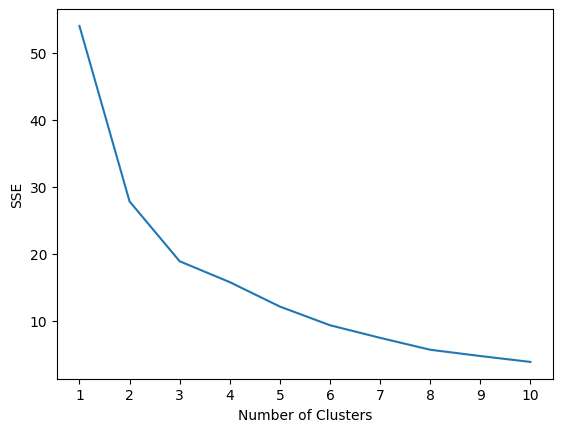

In [ ]:
#initialize kmeans parameters
#on creer un dictionnaire
#on initialise random donc on prend les centres aleatoires au depart
#donc l'algo choisit des point aleatoire comme centre au depart 
kmeans_kwargs = {
"init": "random",
"n_init": 10,#10 le nombre d'initialisation et choisira la meilleur donc qui minimise la somme des carres des erreurs 
"random_state": 1,#generation de nombre aléatoire
}

#create list to hold SSE values for each k
#on cherche la meilleur valeur de k
#sse  va stocker le somme escarrées des erreurs poiur chaque valeur de k 
sse = []
for k in range(1, 11):
    #pour chaque iteration le modele crée un nombre de cluster =k, qui cntioent le sparametres du dictionnaire
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    #une fois terminé on recupre la somme des carres ds erreurs avec inertia
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

We are looking for an "elbow" where the sum of squares begins to "bend" (plier)or stabilize. This usually indicates the optimal number of clusters.

In this graph, there appears to be an "elbow" at k=3 clusters.

Thus, we will use 3 clusters when fitting our k-means clustering model in the next step.

In [7]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

The resulting table shows the cluster assignments for each observation in the DataFrame.

In [6]:
#append cluster assingments to original DataFrame
df['cluster'] = kmeans.labels_

#view updated DataFrame
print(df)

    points  assists  rebounds  cluster
0     18.0      3.0        15        2
2     19.0      4.0        14        2
3     14.0      5.0        10        2
4     14.0      4.0         8        2
5     11.0      7.0        14        2
6     20.0      8.0        13        2
7     28.0      7.0         9        1
8     30.0      6.0         5        1
9     31.0      9.0         4        0
10    35.0     12.0        11        0
11    33.0     14.0         6        0
13    25.0      9.0         5        0
14    25.0      4.0         3        1
15    27.0      3.0         8        1
16    29.0      4.0        12        1
17    30.0     12.0         7        0
18    19.0     15.0         6        0
19    23.0     11.0         5        0


The cluster column contains a cluster number (0, 1, or 2) to which each player has been assigned.

Players belonging to the same cluster have roughly similar values in the points, assists (passes décisives), and rebounds columns.

In [8]:

# Print the inertia
print("Inertia (SSE) for k=3:", kmeans.inertia_)

Inertia (SSE) for k=3: 3.8413064829375694
